# Pruning deep neural networks to make them fast and small
## Train a VGG16 model for COVID19 detection, compress the model with pruning the model using Optimal Brain Damage (OBD) and Regularization methods

M. Amintoosi, m.amintoosi at gmail.com

In [34]:
# For reproducible results 
import torch
torch.manual_seed(1)
import random
random.seed(1)

In [36]:
!git clone https://github.com/mamintoosi/OBD-for-VGG-Pruning-COVID19

/content
Cloning into 'OBD-for-VGG-Pruning-COVID19'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 3706 (delta 38), reused 44 (delta 20), pack-reused 3644
Receiving objects: 100% (3706/3706), 289.77 MiB | 46.28 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (3536/3536), done.


In [38]:
%cd OBD-for-VGG-Pruning-COVID19

/content/OBD-for-VGG-Pruning-COVID19


In [9]:
%%time
# Transfer Learning: Train the VGG16 model
# For reproducible results 
# Check Adam Optimizer
torch.manual_seed(1)
random.seed(1)
# Download a pre-trained VGG16 model and train it
%run finetune_SpReg.py --train --use-cuda --train_epoch 25 --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/val' \
  --output_model 'vgg_covid'

Using CUDA...
Epoch:  1 / 25


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy : 0.785
Epoch:  2 / 25
Accuracy : 0.795
Epoch:  3 / 25
Accuracy : 0.775
Epoch:  4 / 25
Accuracy : 0.615
Epoch:  5 / 25
Accuracy : 0.78
Epoch:  6 / 25
Accuracy : 0.82
Epoch:  7 / 25
Accuracy : 0.675
Epoch:  8 / 25
Accuracy : 0.82
Epoch:  9 / 25
Accuracy : 0.79
Epoch:  10 / 25
Accuracy : 0.81
Epoch:  11 / 25
Accuracy : 0.805
Epoch:  12 / 25
Accuracy : 0.7
Epoch:  13 / 25
Accuracy : 0.82
Epoch:  14 / 25
Accuracy : 0.77
Epoch:  15 / 25
Accuracy : 0.84
Epoch:  16 / 25
Accuracy : 0.665
Epoch:  17 / 25
Accuracy : 0.84
Epoch:  18 / 25
Accuracy : 0.8
Epoch:  19 / 25
Accuracy : 0.815
Epoch:  20 / 25
Accuracy : 0.84
Epoch:  21 / 25
Accuracy : 0.62
Epoch:  22 / 25
Accuracy : 0.72
Epoch:  23 / 25
Accuracy : 0.81
Epoch:  24 / 25
Accuracy : 0.835
Epoch:  25 / 25
Accuracy : 0.85
Finished fine tuning.
CPU times: user 2min 17s, sys: 2min 9s, total: 4min 27s
Wall time: 6min 5s


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

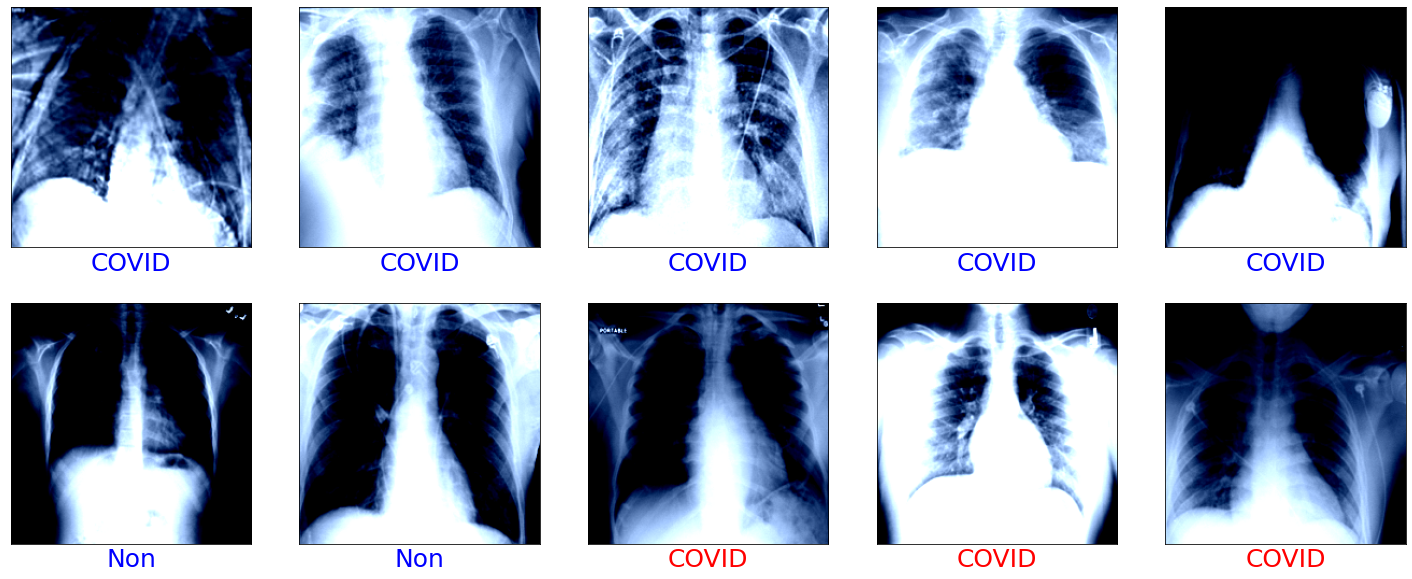

Accuracy : 0.83
CPU times: user 1min 32s, sys: 959 ms, total: 1min 32s
Wall time: 1min 32s


In [10]:
%%time
# Test the transfer learning model
%run finetune_SpReg.py --test --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/test'\
  --input_model 'vgg_covid'

In [40]:
# Pruning the trained model using OBD method
%%time
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg.py --prune --use-cuda --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/val'\
  --input_model 'vgg_covid' --output_model 'vgg_OBD' 

Using CUDA...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy : 0.85
Number of prunning iterations to reduce 60% filters 4
Iter:  1 / 4
Ranking filters.. 
Layers that will be prunned {0: 8, 28: 106, 17: 54, 21: 68, 12: 19, 26: 80, 14: 24, 10: 21, 24: 61, 19: 57, 2: 4, 5: 4, 7: 6}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy : 0.855
Fine tuning to recover from prunning iteration.
Epoch:  1 / 5
Accuracy : 0.715
Epoch:  2 / 5
Accuracy : 0.705
Epoch:  3 / 5
Accuracy : 0.62
Epoch:  4 / 5
Accuracy : 0.67
Epoch:  5 / 5
Accuracy : 0.815
Finished fine tuning.
Iter:  2 / 4
Ranking filters.. 
Layers that will be prunned {28: 171, 24: 47, 26: 88, 19: 53, 17: 35, 5: 5, 21: 63, 14: 11, 10: 17, 12: 14, 0: 4, 7: 2, 2: 2}
Prunning filters.. 
Filters prunned 24.24242424242425%
Accuracy : 0.77
Fine tuning to recover from prunning iteration.
Epoch:  1 / 5
Accuracy : 0.775
Epoch:  2 / 5
Accuracy : 0.75
Epoch:  3 / 5
Accuracy : 0.78
Epoch:  4 / 5
Accuracy : 0.855
Epoch:  5 / 5
Accuracy : 0.82
Finished fine tuning.
Iter:  3 / 4
Ranking filt

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


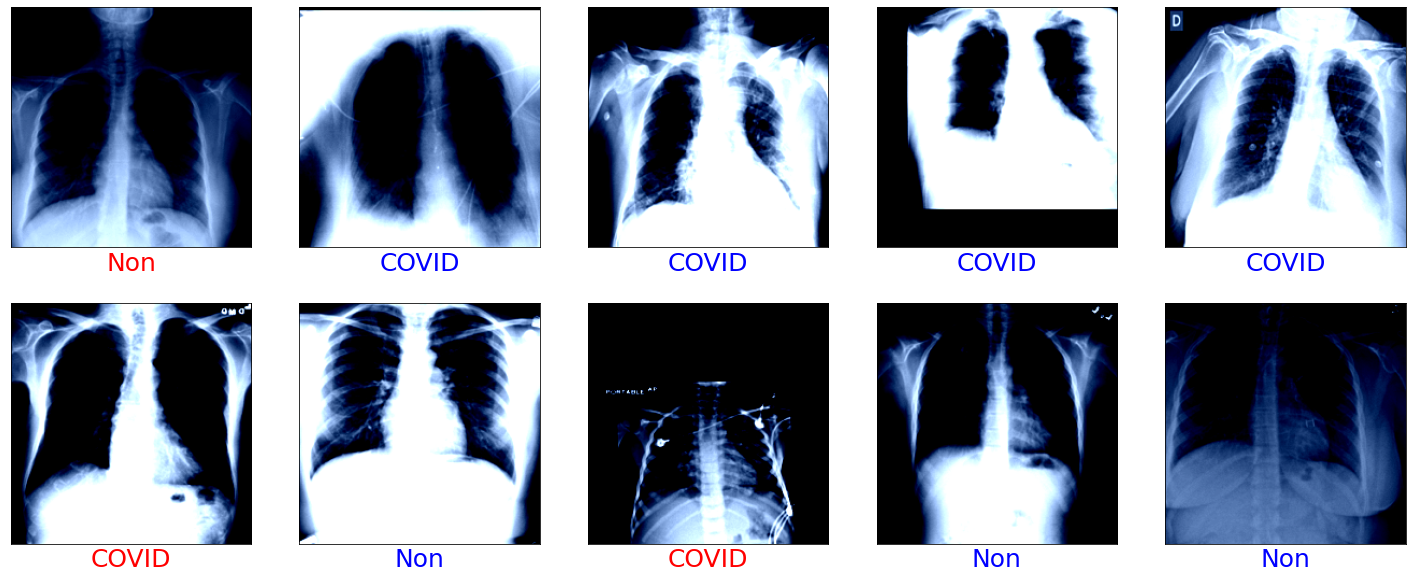

Accuracy : 0.8
CPU times: user 49.6 s, sys: 814 ms, total: 50.4 s
Wall time: 50.2 s


In [41]:
%%time
# Test the pruned model using OBD method
%run finetune_SpReg.py --test --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/test'\
  --input_model 'vgg_OBD'

In [ ]:
%%time
# Pruning the trained model using HSQGL12 method
# For reproducible results 
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg.py --prune --use-cuda --train_epoch 30 --reg_name 'HSQGL12' --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/val'\
  --input_model 'vgg_covid' --output_model 'vgg_HSQGL12'

Using CUDA...
Using Regularization:  HSQGL12


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy : 0.735
Number of prunning iterations to reduce 75% filters 6
Retraining with regularization ... 
Epoch:  1 / 35
Accuracy : 0.68
Epoch:  2 / 35
Accuracy : 0.76
Epoch:  3 / 35
Accuracy : 0.82
Epoch:  4 / 35
Accuracy : 0.835
Epoch:  5 / 35
Accuracy : 0.85
Epoch:  6 / 35
Accuracy : 0.835
Epoch:  7 / 35
Accuracy : 0.87
Epoch:  8 / 35
Accuracy : 0.87
Epoch:  9 / 35
Accuracy : 0.83
Epoch:  10 / 35
Accuracy : 0.855
Epoch:  11 / 35
Accuracy : 0.86
Epoch:  12 / 35
Accuracy : 0.875
Epoch:  13 / 35
Accuracy : 0.825
Epoch:  14 / 35
Accuracy : 0.85
Epoch:  15 / 35
Accuracy : 0.875
Epoch:  16 / 35
Accuracy : 0.865
Epoch:  17 / 35
Accuracy : 0.825
Epoch:  18 / 35
Accuracy : 0.845
Epoch:  19 / 35
Accuracy : 0.845
Epoch:  20 / 35
Accuracy : 0.88
Epoch:  21 / 35
Accuracy : 0.865
Epoch:  22 / 35
Accuracy : 0.86
Epoch:  23 / 35
Accuracy : 0.885
Epoch:  24 / 35
Accuracy : 0.875
Epoch:  25 / 35
Accuracy : 0.875
Epoch:  26 / 35
Accuracy : 0.86
Epoch:  27 / 35
Accuracy : 0.81
Epoch:  28 / 35
Accuracy

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

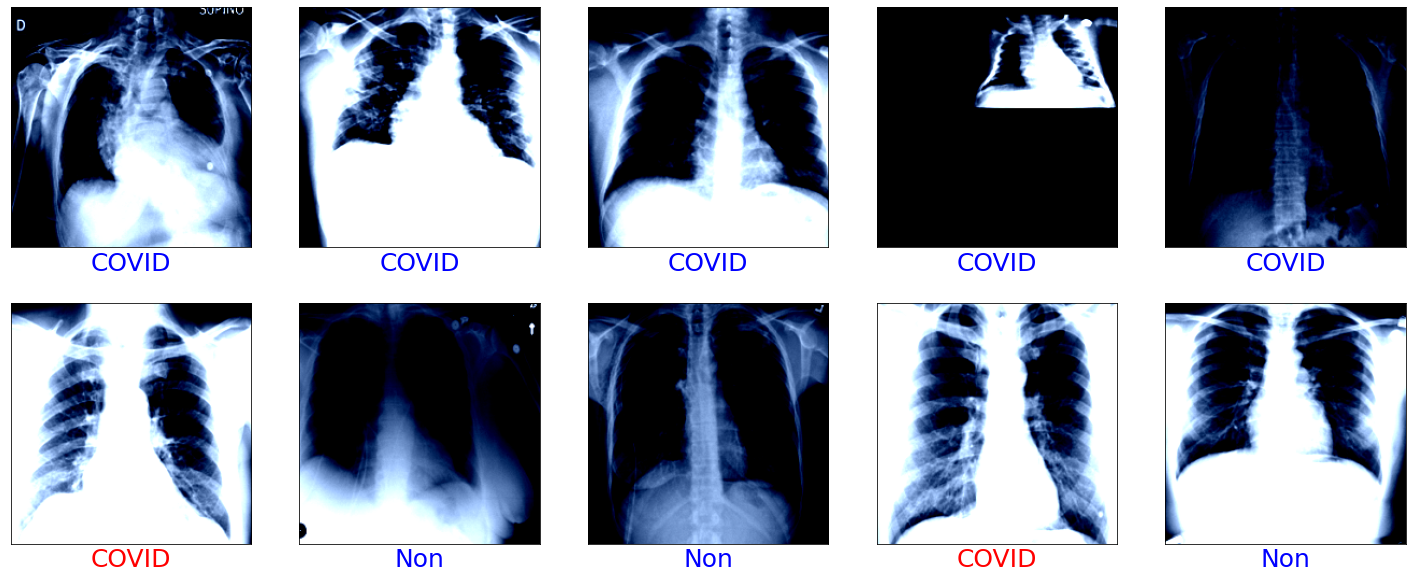

Accuracy : 0.85


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

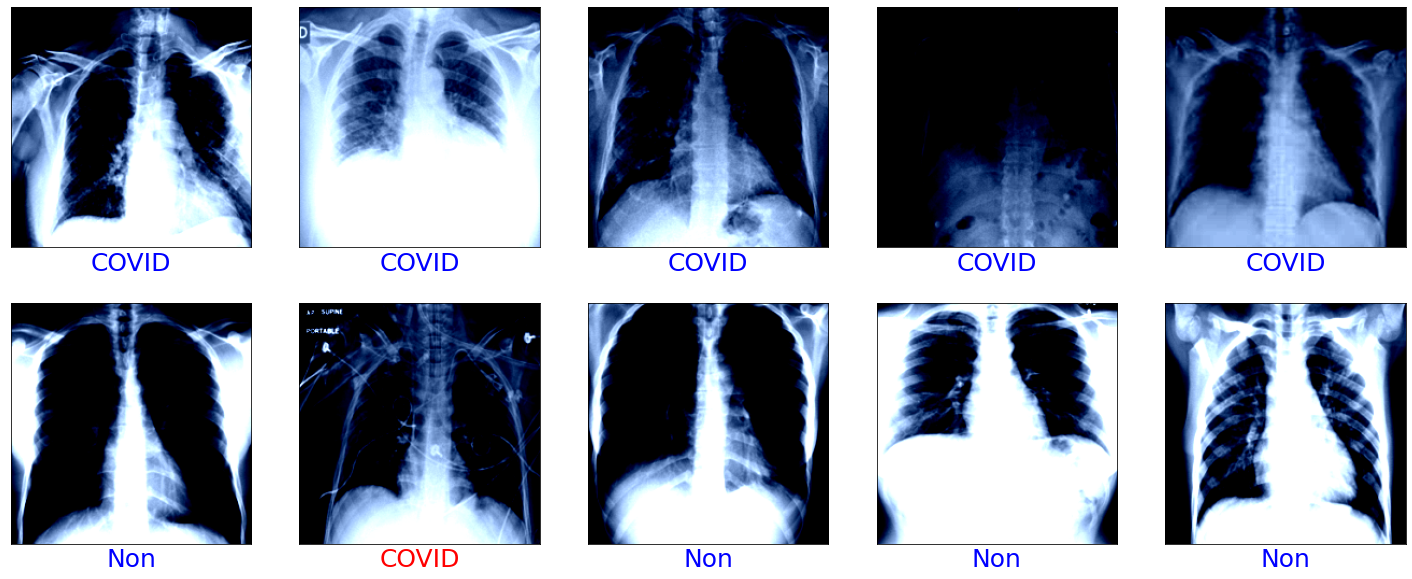

Accuracy : 0.87
CPU times: user 3min 2s, sys: 2.56 s, total: 3min 4s
Wall time: 3min 3s


In [ ]:
%%time
# Test the model with regularization
%run finetune_SpReg.py --test --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/test'\
  --input_model 'vgg_HSQGL12'

In [ ]:
%%time
# Train HSQGL12_OBD_pruned
# For reproducible results 
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg.py --prune --use-cuda --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/val'\
  --input_model 'vgg_HSQGL12' --output_model 'vgg_HSQGL12_OBD'

Using CUDA...


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy : 0.87
Number of prunning iterations to reduce 75% filters 6
Iter:  1 / 6
Ranking filters.. 
Layers that will be prunned {17: 51, 19: 43, 28: 151, 24: 50, 10: 25, 21: 76, 14: 23, 5: 5, 26: 59, 12: 14, 2: 1, 7: 8, 0: 6}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy : 0.86
Fine tuning to recover from prunning iteration.
Epoch:  1 / 5
Accuracy : 0.895
Epoch:  2 / 5
Accuracy : 0.855
Epoch:  3 / 5
Accuracy : 0.84
Epoch:  4 / 5
Accuracy : 0.845
Epoch:  5 / 5
Accuracy : 0.865
Finished fine tuning.
Iter:  2 / 6
Ranking filters.. 
Layers that will be prunned {26: 86, 21: 65, 17: 65, 14: 22, 10: 12, 12: 14, 0: 5, 19: 59, 28: 83, 24: 73, 7: 11, 5: 11, 2: 6}
Prunning filters.. 
Filters prunned 24.24242424242425%
Accuracy : 0.855
Fine tuning to recover from prunning iteration.
Epoch:  1 / 5
Accuracy : 0.875
Epoch:  2 / 5
Accuracy : 0.87
Epoch:  3 / 5
Accuracy : 0.86
Epoch:  4 / 5
Accuracy : 0.665
Epoch:  5 / 5
Accuracy : 0.89
Finished fine tuning.
Iter:  3 / 6
Ranking fi

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

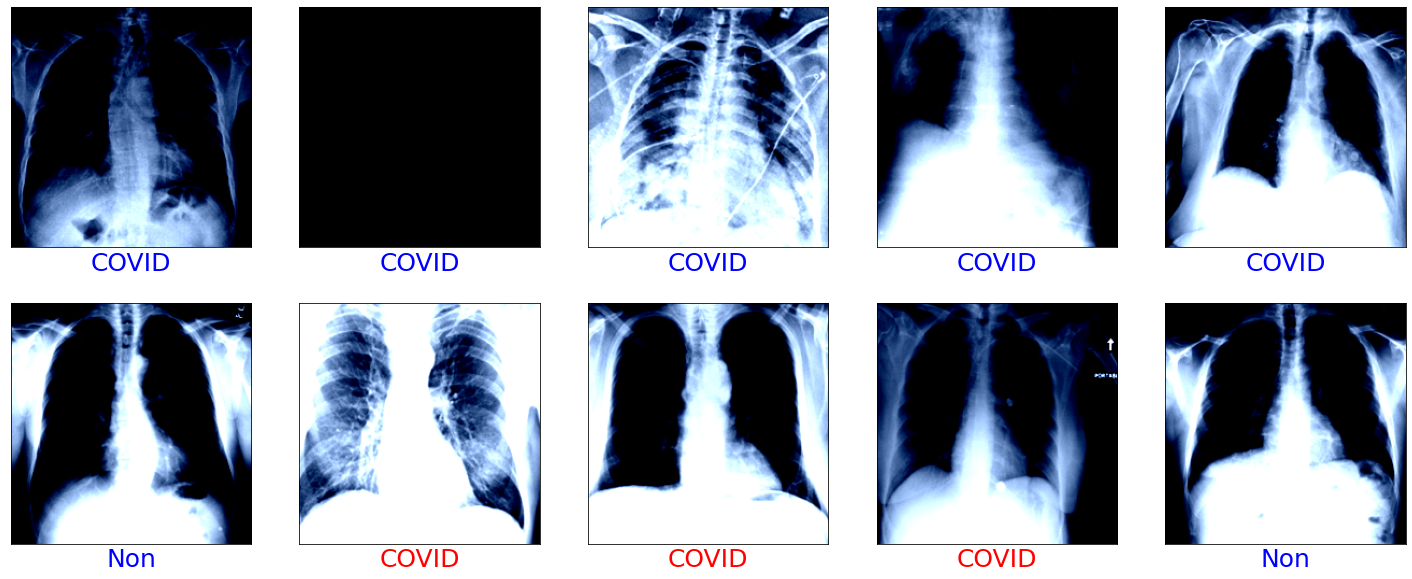

Accuracy : 0.68
CPU times: user 22.7 s, sys: 232 ms, total: 22.9 s
Wall time: 22.8 s


In [ ]:
%%time
# Test the HSQGL12_OBD model 
%run finetune_SpReg.py --test --ds_name 'COVID-Radiography' \
  --train_path 'data/COVID-Radiography/train' --test_path 'data/COVID-Radiography/test'\
  --input_model 'vgg_HSQGL12_OBD_pruned'